# Assignment 2018 - Fundamentals of Data Analysis

The Anscombe's is a famous dataset in data analysis for demonstrating the importance of visually inspecting data before performing statistical tests.

In this assignment, i will cover the following four questions: 

- I will look at the **background of the dataset**.
- The **descriptive statistics** of the dataset will be presented using numpy and pandas.
- The data will be **plotted** using Seaborn
- I will investigate the **contrast** between the descriptive statistics and the plots.

## 1. Background to the Dataset

Anscombe's Quartet contains four distinct bivariate datasets. Each dataset contains two variables X and Y with 11 datapoints each. The Quartet was created by the English Statistician Frank Anscombe in 1973 [1].

Anscombe did not explain how he created the dataset and it is not known to this day how it was generated [2], however several methods have been formulated since to create datasets with similar characteristics [3]. Chatterjee and Firat (2009) used a genetic algorithm to create similar datasets [4]. A genetic algorithm randomly **selects** parents from a population (of datasets in this instance). The parents are **combined** to create children. Random **mutations** are applied during the process [5]. The process repeats and, over time, the population is optimised for a particular purpose.  

Anscombe create the datasets to demonstrate the importance visualising data before performing statistical tests. He also created them to demonstrate the effect that outliers can have on statistical tests [6]. 

As we will see, the descriptive statistics of the datasets are very similar, however, once visualised they look different and the statistics are misleading. 

[\[1\]](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966)
[\[2\]](https://dl.acm.org/citation.cfm?id=3025912)
[\[3\]](https://dl.acm.org/citation.cfm?id=2655780.2655876)
[\[4\]](https://www.jstor.org/stable/27643902?seq=1#page_scan_tab_contents)
[\[5\]](https://www.mathworks.com/help/gads/what-is-the-genetic-algorithm.html)
[\[6\]](https://astro.swarthmore.edu/astro121/anscombe.html)

We will now quickly examine three characteristics that may distort descriptive and inferential statistics of a dataset. All three can be observed when visualising the dataset: 


- **Skewness**
- **Outliers**
- **Correlation does not imply causation**



### Skewness of Data


A distribution of data is a graphical representation of the frequency of values in a dataset. A normal distribution is a symmetrically shaped distribution and has the same mean, median and mode. 

![Normal Distribution](http://my.ilstu.edu/~gjin/hsc204-eh/Module-5-Summary-Measure-2/averages-for-symmetrical-distribution.jpg "Normal Distribution")

A skewed distribution is formed when the data tends to cluster on one extreme of the data set. In a right skewed or positive positive skewed distribution, the data is bunched on the left, forming a peak and then a long tail on the right. The mean tends to be larger than the median in a positive skew [1].

![Positive Skewed Distribution](http://davidmlane.com/hyperstat/pictures/positive_skew.gif "Positive Skewed Distribution")

A negative skewed distribution has a long tail to the left and is bunched on the right-hand side of the histogram.

![Negative Skewed Distribution](http://davidmlane.com/hyperstat/pictures/negative_skew.gif "Negative Skewed Distribution")

A skewed distribution may indicate that summary statistics are varied and, therefore, not as accurate at genuinely representing the dataset (though, as we will see in the Anscombe dataset, the mean and median may be similar in a skewed dataset). 

Many inferential statistical tests assume that the data is normally distribution. 

[\[1\]](https://www.mathsisfun.com/data/skewness.html)


### Outliers

An outlier is a datapoint that is abnormally distant from the other data in the dataset. It is so different that it may be a   misrecording or an error in calculation.

![Outlier](http://www-ist.massey.ac.nz/dstirlin/CAST/CAST/HdisplayInterp/images/outlierSymmetric.gif "Outlier")

Outliers can severely compromise summary descriptives (the mean is particularly sensitive to outliers) and can also impair correlation and linear regression analysis. 

[\[1\]](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)


### Correlation does not imply causation

Firstly, a statistically significant correlation or linear regression finding does not imply that there is an actually linear relationship between two variables. 

![Pirates](http://i.stack.imgur.com/bDhy4.jpg "Pirates")

The above plot purports to show a positive linear relationship between global temperatures and the global pirate population. Evidence for a correlation has to come from outside the statistical test itself. 

Following on from this, one should always look at a plot of the data before performing a correlation or linear regression. These tests could be significant (due to outliers, for example), even if a visualisation of the data clearly shows no positive linear relationship. 

[\[1\]](https://www.forbes.com/sites/erikaandersen/2012/03/23/true-fact-the-lack-of-pirates-is-causing-global-warming/#7759d22d3a67)

As we examine the dataset, we will try to look for outliers, skewness and incorrect correlation and linear analysis.

## 2. Descriptive Statistics

In this section i will layout the descriptive statistics of the Anscombe's quartet using Numpy and Pandas. 

Firstly, in the next cell i will import the various packages/modules i will use in this investigation, including pandas and numpy.

In [11]:
import seaborn as sns # plotting software
import numpy as np 
import matplotlib.pyplot as plt
from numpy import median, mean, var, std # modules for 
import pandas as pd
from IPython.display import display_html, Markdown, display # These modules make it easier to display tables and 
                                                            # plots in jupyter notebook 


In [12]:
def printmd(string): # This function allows you to use markdown in output cells, taken from: https://stackoverflow.com/questions/32026727/format-output-of-code-cell-with-markdown
    display(Markdown(string))

In [13]:
df = sns.load_dataset("anscombe") # The Anscombe's Quartet is loaded through seaborn and transformed into a Pandas Dataframe  .

In [14]:
Q1 = df.loc[df['dataset'] == 'I'] # The four datasets are transformed into their own dataframe
Q2 = df.loc[df['dataset'] == 'II']
Q3 = df.loc[df['dataset'] == 'III']
Q4 = df.loc[df['dataset'] == 'IV']

In [15]:
Q1=Q1.drop('dataset',1) # The 'datset' column is removed from each of the datasets. 
Q2=Q2.drop('dataset',1)
Q3=Q3.drop('dataset',1)
Q4=Q4.drop('dataset',1)

In [16]:
printmd("**Ascombe's Quartet**") # Function allowing the title to be displayed in bold using markdown.
Q1_styler = Q1.style.set_table_attributes("style='display:inline'").set_caption('Q 1') # Code allowing the datasets to be displayed
Q2_styler = Q2.style.set_table_attributes("style='display:inline'").set_caption('Q 2') # side by side. 
Q3_styler = Q3.style.set_table_attributes("style='display:inline'").set_caption('Q 3')
Q4_styler = Q4.style.set_table_attributes("style='display:inline'").set_caption('Q 4')
# This code derived from: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
display_html(Q1_styler._repr_html_() + Q2_styler._repr_html_() + Q3_styler._repr_html_() + Q4_styler._repr_html_(), raw=True)


**Ascombe's Quartet**

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


The pandas.describe() function is used to calculate the main descriptive statistics of the datasets. The **mean** and **standard deviation** are the same across all datasets. 

In [8]:
printmd("**Ascombe's Quartet Summary Statistics**")
Q1_describe = Q1.describe() 
Q2_describe = Q2.describe() 
Q3_describe = Q3.describe() 
Q4_describe = Q4.describe() 

Q1_styler = Q1_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 1')
Q2_styler = Q2_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 2')
Q3_styler = Q3_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 3')
Q4_styler = Q4_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 4')

display_html(Q1_styler._repr_html_() + Q2_styler._repr_html_()+Q3_styler._repr_html_()+Q4_styler._repr_html_(), raw=True)

# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

**Ascombe's Quartet Summary Statistics**

,x,y
count,11,11
mean,9,7.50091
std,3.31662,2.03157
min,4,4.26
25%,6.5,6.315
50%,9,7.58
75%,11.5,8.57
max,14,10.84
,x,y
count,11,11


The **variance** is the standard deviation squared and i will use the pandas var() function to calculate it across all datasets. 
The variance also appears to be the same. 

In [9]:
printmd("**Ascombe's Quartet Variance**")
Q1_var = Q1.var() 
Q1_var_table = pd.DataFrame(Q1_var, columns=["Q 1"]) # The var output must be converted to a pandas dataframe before it can
                                                     # be displayed using the styler method below.
Q2_var = Q2.var() 
Q2_var_table = pd.DataFrame(Q2_var, columns=["Q 2"])

Q3_var = Q3.var() 
Q3_var_table = pd.DataFrame(Q3_var, columns=["Q 3"])

Q4_var = Q4.var() 
Q4_var_table = pd.DataFrame(Q4_var, columns=["Q 4"])

Q1_styler_var = Q1_var_table.style.set_table_attributes("style='display:inline'")
Q2_styler_var = Q2_var_table.style.set_table_attributes("style='display:inline'")
Q3_styler_var = Q3_var_table.style.set_table_attributes("style='display:inline'")
Q4_styler_var = Q4_var_table.style.set_table_attributes("style='display:inline'")

display_html(Q1_styler_var._repr_html_() + Q2_styler_var._repr_html_()+Q3_styler_var._repr_html_()+Q4_styler_var._repr_html_(), raw=True)


**Ascombe's Quartet Variance**

,Q 1
x,11
y,4.12727
,Q 2
x,11
y,4.12763
,Q 3
x,11
y,4.12262
,Q 4
x,11


The below cell uses numpy to shows
thas the standard deviation is calculated by getting the square root of the variance. 

In [10]:
np.sqrt(Q1_var["x"])

3.3166247903554

The **median** is calculated using pandas. Here, we do see some differences. The median of the Y variables appear to be different from the mean. This suggests a possible **skewed** non-normal distribution.

In [11]:
printmd("**Ascombe's Quartet Median**")
Q1_median = Q1.median() 
Q1_median_table = pd.DataFrame(Q1_median, columns=["Q 1"])

Q2_median = Q2.median() 
Q2_median_table = pd.DataFrame(Q2_median, columns=["Q 2"])

Q3_median = Q3.median() 
Q3_median_table = pd.DataFrame(Q3_median, columns=["Q 3"])

Q4_median = Q4.median() 
Q4_median_table = pd.DataFrame(Q4_median, columns=["Q 4"])

Q1_styler_median = Q1_median_table.style.set_table_attributes("style='display:inline'")
Q2_styler_median = Q2_median_table.style.set_table_attributes("style='display:inline'")
Q3_styler_median = Q3_median_table.style.set_table_attributes("style='display:inline'")
Q4_styler_median = Q4_median_table.style.set_table_attributes("style='display:inline'")

display_html(Q1_styler_median._repr_html_() + Q2_styler_median._repr_html_()+Q3_styler_median._repr_html_()+Q4_styler_median._repr_html_(), raw=True)


**Ascombe's Quartet Median**

,Q 1
x,9
y,7.58
,Q 2
x,9
y,8.14
,Q 3
x,9
y,7.11
,Q 4
x,8


Finally, we look at the **correlation** of the two variables in each dataset, again using pandas.The correlation also appears to be identical across the datasets. 

In [12]:
printmd("**Ascombe's Quartet Correlation**")
Q1_corr = Q1.corr() 
Q2_corr = Q2.corr() 
Q3_corr = Q3.corr() 
Q4_corr = Q4.corr() 

Q1_styler = Q1_corr.style.set_table_attributes("style='display:inline'").set_caption('Q 1')
Q2_styler = Q2_corr.style.set_table_attributes("style='display:inline'").set_caption('Q 2')
Q3_styler = Q3_corr.style.set_table_attributes("style='display:inline'").set_caption('Q 3')
Q4_styler = Q4_corr.style.set_table_attributes("style='display:inline'").set_caption('Q 4')

display_html(Q1_styler._repr_html_() + Q2_styler._repr_html_()+Q3_styler._repr_html_()+Q4_styler._repr_html_(), raw=True)



**Ascombe's Quartet Correlation**

,x,y
x,1,0.816421
y,0.816421,1
,x,y
x,1,0.816237
y,0.816237,1
,x,y
x,1,0.816287
y,0.816287,1
,x,y
x,1,0.816521


The **mean**, **standard deviation** and **variance** are similar across all datasets. However, slight differences in the **median**, suggest the data merits further investigation. 

We will now visually inspect the data. 

## 3. Plotting the Data

Barplots are not particularly useful in this case as they simply visualise the descriptive statistics; not the data itself. 
The comparison below of the median, however, does show some differences between the datasets. You can change the estimator to **mean**, **std** or **var** to get a comparison of these statistics. 

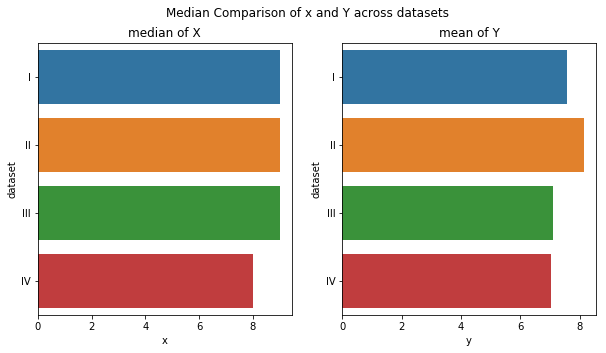

In [13]:
fig, (left, right) = plt.subplots(1,2, figsize=(10, 5)) # The figure and subplot methods are used to place the plots side by side.
sns.barplot(x="x", y="dataset", data=df, ci=None, estimator=median, ax=left) # Derived from: https://stackoverflow.com/questions/41570747/unwanted-blank-subplots-in-matplotlib
left.set_title("median of X") # titles each plot                      
sns.barplot(x="y", y="dataset", data=df, ci=None, estimator=median, ax=right) # ax - places the plot on the left or the right.
right.set_title("mean of Y")
fig.suptitle("Median Comparison of x and Y across datasets") # overall title for the subplot
plt.show()

The **boxplots** below begin to show the real story of the data. Beginning with the X values:

- Database one, two and three all have a very similar uniform distribution. 
- Database four is completely unique. All the values appear to be the same, except for an extreme outlier. 

Now with the Y values:

- Database one appears to have a cluster around the median.
- Database two appears to have an extreme left skew. 
- Database three and four have extreme outliers. 

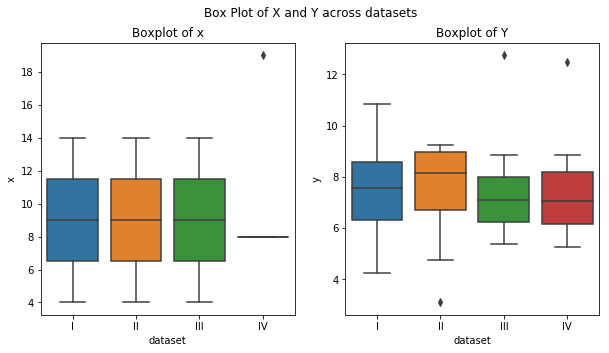

In [14]:
fig, (left, right) = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x=df["dataset"], y=df["x"], ax=left)
left.set_title("Boxplot of x")
sns.boxplot(x=df["dataset"], y=df["y"], ax=right)
right.set_title("Boxplot of Y")
fig.suptitle("Box Plot of X and Y across datasets")
plt.show()

The **swarmplots** below plot each bivariate datapoint and tell a similar story to the boxplots.

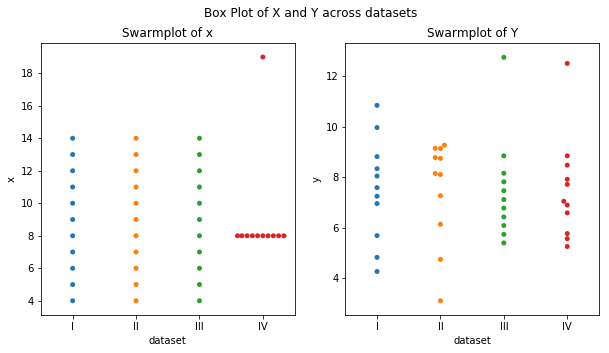

In [15]:
fig, (left, right) = plt.subplots(1,2, figsize=(10, 5))

sns.swarmplot(x=df["dataset"], y=df["x"], ax=left)
left.set_title("Swarmplot of x")

sns.swarmplot(x=df["dataset"], y=df["y"], ax=right)
right.set_title("Swarmplot of Y")
fig.suptitle("Box Plot of X and Y across datasets")
plt.show()

Though this is a small dataset, it would be useful to look at **histograms**, to investigate skewness. We will first look at the X values. 

- Dataset one, two and three all appear to be uniform distributions. 
- Dataset four is very different and shows the outlier clearly. 

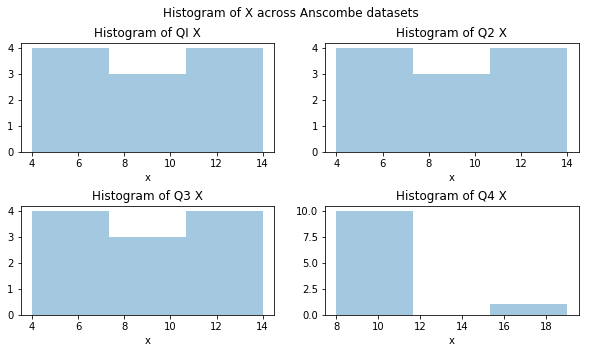

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 5)) # four plots - 2 X 2 - will be plotted in a grid pattern.
plt.subplots_adjust(hspace=.5) # The space between the plots is increased. Cite: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html 

sns.distplot(Q1["x"], kde=False, ax=ax1) # distplots are histograms in seaborn
ax1.set_title("Histogram of QI X")

sns.distplot(Q2["x"], kde=False, ax=ax2) 
ax2.set_title("Histogram of Q2 X")

sns.distplot(Q3["x"], kde=False, ax=ax3)
ax3.set_title("Histogram of Q3 X")


sns.distplot(Q4["x"], kde=False, ax=ax4)
ax4.set_title("Histogram of Q4 X")

fig.suptitle("Histogram of X across Anscombe datasets")

plt.show()


**Histograms** of Y show some very skewed distributions:

- Dataset one appears to be fairly uniform. 
- Dataset two shows the extreme left-skew that we saw early in the swarmplot and boxplot. 
- Dataset three and four are right-skewed, but this is due to the outliers we observed earlier. 

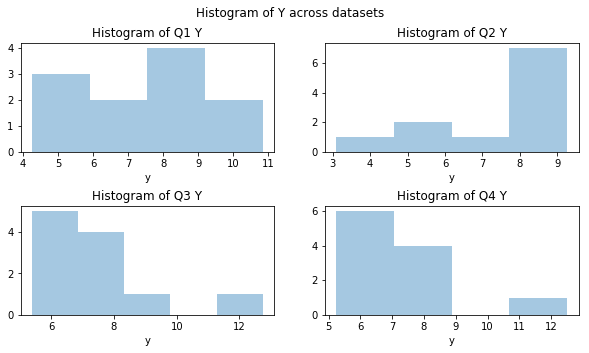

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 5))
plt.subplots_adjust(hspace=.5)

sns.distplot(Q1["y"], kde=False, hist=True, ax=ax1)
ax1.set_title("Histogram of Q1 Y")

sns.distplot(Q2["y"], kde=False, hist=True, ax=ax2)
ax2.set_title("Histogram of Q2 Y")

sns.distplot(Q3["y"], kde=False, hist=True, ax=ax3)
ax3.set_title("Histogram of Q3 Y")


sns.distplot(Q4["y"], kde=False, hist=True, ax=ax4)
ax4.set_title("Histogram of Q4 Y")

fig.suptitle("Histogram of Y across datasets")

plt.show()


Finally, we will look at the bivariate relationship between the variables. The descriptive statistics suggest that they all have a positive correlation of about 0.8. The 'line of best fit' in the regression plots below also suggest that they have a  strong positive linear relationship. 

However, again, the visual data tells a different story: 

- Q1 was the one dataset that looked relatively normal in the other plots and does appear to have a positive linear relationship
- Q2 certainly appears to have a relationship, but it is not linear as suggested by the statistics. It appears to be quadratic [1].
- Q3 looks like it would have a strong linear relationship, though the outlier is skewing the line dramatically. 
- Q4 clearly has not linear relationship whatsoever. The outlier has completely skewed the result. 

A visual inspections suggests that a linear regression analysis was never appropriate for most of these data sets. 

[\[1\]](http://www.rpubs.com/debosruti007/anscombeQuartet)

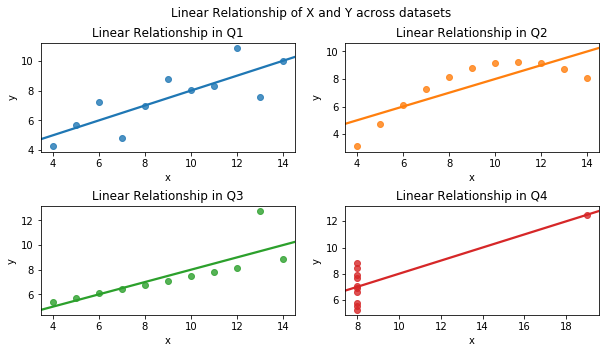

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 5))
plt.subplots_adjust(hspace=.5)

sns.regplot(x="x", y="y", data=Q1, ax=ax1, ci=None)
ax1.set_title("Linear Relationship in Q1")

sns.regplot(x="x", y="y", data=Q2, ax=ax2, ci=None)
ax2.set_title("Linear Relationship in Q2")


sns.regplot(x="x", y="y", data=Q3, ax=ax3, ci=None)
ax3.set_title("Linear Relationship in Q3")


sns.regplot(x="x", y="y", data=Q4, ax=ax4, ci=None)
ax4.set_title("Linear Relationship in Q4")
fig.suptitle("Linear Relationship of X and Y across datasets")

plt.show()

## 4. Contrast in results